In [1]:
from statsbombpy import sb
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns
import numpy as np
import pandas as pd

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
sb.competitions()

credentials were not supplied. open data access only


,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
0,16,4,Europe,Champions League,male,2018/2019,2021-04-11T22:02:53.549443,2021-04-11T22:02:53.549443
1,16,1,Europe,Champions League,male,2017/2018,2021-01-23T21:55:30.425330,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,2016/2017,2020-08-26T12:33:15.869622,2020-07-29T05:00
3,16,27,Europe,Champions League,male,2015/2016,2020-08-26T12:33:15.869622,2020-07-29T05:00
4,16,26,Europe,Champions League,male,2014/2015,2020-08-26T12:33:15.869622,2020-07-29T05:00
5,16,25,Europe,Champions League,male,2013/2014,2020-08-26T12:33:15.869622,2020-07-29T05:00
6,16,24,Europe,Champions League,male,2012/2013,2020-08-26T12:33:15.869622,2020-07-29T05:00
7,16,23,Europe,Champions League,male,2011/2012,2020-08-26T12:33:15.869622,2020-07-29T05:00
8,16,22,Europe,Champions League,male,2010/2011,2020-07-29T05:00,2020-07-29T05:00
9,16,21,Europe,Champions League,male,2009/2010,2020-07-29T05:00,2020-07-29T05:00


In [5]:
mat = sb.matches(competition_id=43, season_id=3)

credentials were not supplied. open data access only


In [6]:
mat.columns

Index(['match_id', 'match_date', 'kick_off', 'competition', 'season',
       'home_team', 'away_team', 'home_score', 'away_score', 'match_status',
       'match_status_360', 'last_updated', 'last_updated_360', 'match_week',
       'competition_stage', 'stadium', 'referee', 'data_version',
       'shot_fidelity_version', 'xy_fidelity_version'],
      dtype='object')

In [9]:
E = mat[(mat['away_score']>3) | (mat['home_score']>3)]
E

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,data_version,shot_fidelity_version,xy_fidelity_version
21,7580,2018-06-30,21:00:00.000,International - FIFA World Cup,2018,France,Argentina,4,3,available,unscheduled,2020-07-29T05:00,None,4,Round of 16,NaN,NaN,1.0.2,None,None
24,8658,2018-07-15,17:00:00.000,International - FIFA World Cup,2018,France,Croatia,4,2,available,unscheduled,2020-07-29T05:00,None,7,Final,Stadion Luzhniki,N. Pitana,1.0.2,None,None
31,7552,2018-06-23,14:00:00.000,International - FIFA World Cup,2018,Belgium,Tunisia,5,2,available,unscheduled,2020-07-29T05:00,None,2,Group Stage,Otkrytiye Arena,J. Marrufo,1.0.2,None,None
44,7525,2018-06-14,17:00:00.000,International - FIFA World Cup,2018,Russia,Saudi Arabia,5,0,available,unscheduled,2020-07-29T05:00,None,1,Group Stage,Stadion Luzhniki,N. Pitana,1.0.2,None,None
50,7554,2018-06-24,14:00:00.000,International - FIFA World Cup,2018,England,Panama,6,1,available,unscheduled,2020-07-29T05:00,None,2,Group Stage,Stadion Nizhny Novgorod,Ghead Grisha,1.0.2,None,None


In [20]:
events = sb.events(match_id = 7580)
events

credentials were not supplied. open data access only


,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,counterpress,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",France,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Argentina,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,France,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,00:00:00.000,Half Start,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,NaN,Yellow Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,France,00:48:18.547,Bad Behaviour,NaN
3545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,00:10:12.600,Error,NaN
3546,"{'outcome': {'id': 1, 'name': 'Lost'}}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,France,00:19:59.160,50/50,True
3547,"{'outcome': {'id': 4, 'name': 'Won'}}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,00:19:59.160,50/50,True


In [42]:
events.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'counterpress', 'dribble_nutmeg',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_penalty', 'foul_won_advantage', 'foul_won_defensive',
       'foul_won_penalty', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location',
       'match_id', 'minute', 'pass_aerial_won', 'pass_angle',
       'pass_assisted_shot_id', 'pass_backheel', 'pass_body_part',
       'pass_cross', 'pass_deflected', 'pass_end_location', 'pass_goal_assist',
       'pass_height', 'pass_length', 'pass_miscommunication', 'pass_outcome'

In [43]:
E_pass = events[['type', 'pass_angle', 'pass_height', 'pass_length', 'pass_outcome']]
E_pass

,type,pass_angle,pass_height,pass_length,pass_outcome
0,Starting XI,NaN,NaN,NaN,NaN
1,Starting XI,NaN,NaN,NaN,NaN
2,Half Start,NaN,NaN,NaN,NaN
3,Half Start,NaN,NaN,NaN,NaN
4,Half Start,NaN,NaN,NaN,NaN
...,...,...,...,...,...
3544,Bad Behaviour,NaN,NaN,NaN,NaN
3545,Error,NaN,NaN,NaN,NaN
3546,50/50,NaN,NaN,NaN,NaN
3547,50/50,NaN,NaN,NaN,NaN


In [44]:
E_pass = E_pass[E_pass['type'] == 'Pass']
E_pass

,type,pass_angle,pass_height,pass_length,pass_outcome
6,Pass,2.692869,Ground Pass,29.966648,NaN
7,Pass,0.249979,High Pass,48.507732,Unknown
8,Pass,0.018180,High Pass,55.009090,Incomplete
9,Pass,1.190290,Low Pass,21.540659,NaN
10,Pass,-3.036716,High Pass,19.104973,NaN
...,...,...,...,...,...
886,Pass,-0.759763,Ground Pass,27.586230,NaN
887,Pass,0.699893,High Pass,49.678970,NaN
888,Pass,-0.982794,High Pass,36.055510,NaN
889,Pass,-0.896055,Low Pass,6.403124,NaN


In [45]:
E_pass.pass_height.unique()

array(['Ground Pass', 'High Pass', 'Low Pass'], dtype=object)

In [46]:
E_pass.pass_outcome.unique()

array([nan, 'Unknown', 'Incomplete', 'Out', 'Pass Offside'], dtype=object)

### Apply a particular score to the *pass_height* and to the *pass_outcome*

In [47]:
E_pass['pass_height'] = E_pass['pass_height'].replace(['Ground Pass', 'High Pass', 'Low Pass'], [3, 1, 2])
E_pass

<ipython-input-47-fc7b1a033553>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  E_pass['pass_height'] = E_pass['pass_height'].replace(['Ground Pass', 'High Pass', 'Low Pass'], [3, 1, 2])


,type,pass_angle,pass_height,pass_length,pass_outcome
6,Pass,2.692869,3,29.966648,NaN
7,Pass,0.249979,1,48.507732,Unknown
8,Pass,0.018180,1,55.009090,Incomplete
9,Pass,1.190290,2,21.540659,NaN
10,Pass,-3.036716,1,19.104973,NaN
...,...,...,...,...,...
886,Pass,-0.759763,3,27.586230,NaN
887,Pass,0.699893,1,49.678970,NaN
888,Pass,-0.982794,1,36.055510,NaN
889,Pass,-0.896055,2,6.403124,NaN


In [48]:
E_pass.pass_outcome.unique()

array([nan, 'Unknown', 'Incomplete', 'Out', 'Pass Offside'], dtype=object)

In [49]:
E_pass['pass_outcome'] = E_pass['pass_outcome'].fillna(1)
E_pass

<ipython-input-49-3e78a7b7e735>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  E_pass['pass_outcome'] = E_pass['pass_outcome'].fillna(1)


,type,pass_angle,pass_height,pass_length,pass_outcome
6,Pass,2.692869,3,29.966648,1
7,Pass,0.249979,1,48.507732,Unknown
8,Pass,0.018180,1,55.009090,Incomplete
9,Pass,1.190290,2,21.540659,1
10,Pass,-3.036716,1,19.104973,1
...,...,...,...,...,...
886,Pass,-0.759763,3,27.586230,1
887,Pass,0.699893,1,49.678970,1
888,Pass,-0.982794,1,36.055510,1
889,Pass,-0.896055,2,6.403124,1


In [50]:
E_pass['pass_outcome'] = E_pass['pass_outcome'].replace(['Unknown', 'Incomplete', 'Out', 'Pass Offside'], 0)
E_pass

<ipython-input-50-1a6d08efdb19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  E_pass['pass_outcome'] = E_pass['pass_outcome'].replace(['Unknown', 'Incomplete', 'Out', 'Pass Offside'], 0)


,type,pass_angle,pass_height,pass_length,pass_outcome
6,Pass,2.692869,3,29.966648,1
7,Pass,0.249979,1,48.507732,0
8,Pass,0.018180,1,55.009090,0
9,Pass,1.190290,2,21.540659,1
10,Pass,-3.036716,1,19.104973,1
...,...,...,...,...,...
886,Pass,-0.759763,3,27.586230,1
887,Pass,0.699893,1,49.678970,1
888,Pass,-0.982794,1,36.055510,1
889,Pass,-0.896055,2,6.403124,1


In [51]:
E_pass.pass_outcome.unique()

array([1, 0], dtype=int64)

In [52]:
E_pass = E_pass[['pass_angle', 'pass_height', 'pass_length', 'pass_outcome']]
E_pass

,pass_angle,pass_height,pass_length,pass_outcome
6,2.692869,3,29.966648,1
7,0.249979,1,48.507732,0
8,0.018180,1,55.009090,0
9,1.190290,2,21.540659,1
10,-3.036716,1,19.104973,1
...,...,...,...,...
886,-0.759763,3,27.586230,1
887,0.699893,1,49.678970,1
888,-0.982794,1,36.055510,1
889,-0.896055,2,6.403124,1


### Here *pass_outcome* is the dependent variable and the other columns represent the independent variables

In [56]:
x = E_pass[['pass_angle', 'pass_height', 'pass_length']]
y = E_pass['pass_outcome']
x.shape, y.shape

((885, 3), (885,))

### We have a large data set. So, we will split it into training and test data using *scikit learn* module. Out of 885 rows, we will use the first 309 rows as a training data set, which is around 35% of the whole data.

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.35, random_state = 0)

In [67]:
x_train

,pass_angle,pass_height,pass_length
19,2.587285,3,24.698177
790,-0.909753,3,34.205260
461,-2.176341,3,15.811388
848,2.265535,3,7.810250
166,0.708626,3,9.219544
...,...,...,...
841,1.373401,1,5.099019
198,-2.356194,3,36.769554
635,0.750929,3,20.518284
565,-2.574863,3,13.038404


### Now we apply the logistic regression and build the model

In [68]:
lr = LogisticRegression()

### We use the training data to fit the model

In [69]:
lr.fit(x_train, y_train)

LogisticRegression()

### We can now predict on the remaining test data

In [70]:
y_predicted = lr.predict(x_test)
y_predicted

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,

### We will now generate the *Error Matrix* also known as the *Confusion Matrix* which will tell us how accurate our model is

<AxesSubplot:xlabel='Predicted', ylabel='Original'>

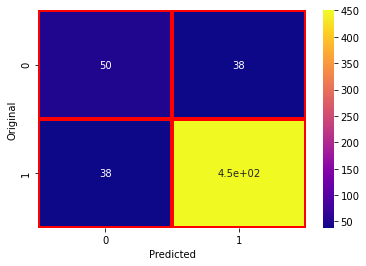

In [83]:
error_matrix = pd.crosstab(y_test, y_predicted, rownames=['Original'], colnames=['Predicted'])
sns.heatmap(error_matrix, annot=True, cmap = 'plasma', linewidths = 3, linecolor = 'red')

In [75]:
accuracy = metrics.accuracy_score(y_test, y_predicted)
accuracy

0.8680555555555556

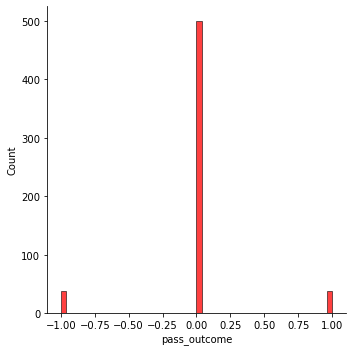

In [84]:
sns.displot((y_test - y_predicted), bins = 50, color = 'red')